# Analysis Pipeline

Quando observamos

In [24]:
# Load the packages

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
from matplotlib import rcParams

# Load data and global variables

preprocessed_file = 'preprocessing/preprocessed.h5ad'
results_file = 'analysis/analysed.h5ad'

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

adata = sc.read(preprocessed_file)

## Looking for gene expression patterns in reduced space

## Interferon regulatory factor 8 (IRF8)

- transcription factor
- part of the myeloid cell maturation

computing PCA
    with n_comps=50
    finished (0:00:01)


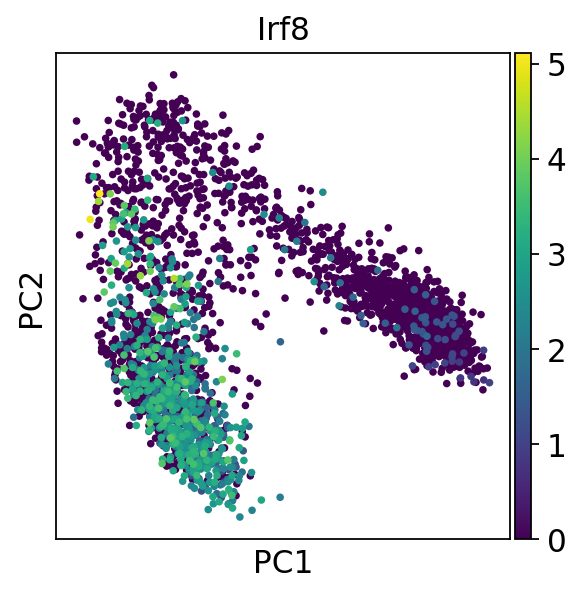

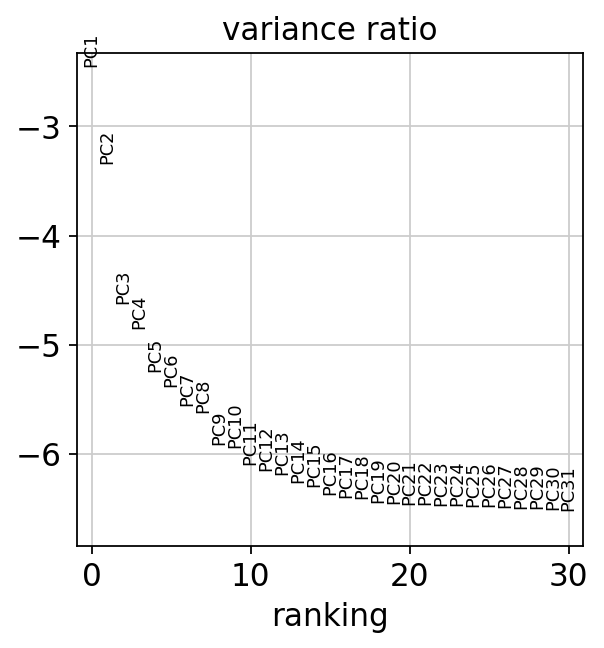

In [25]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='Irf8')
sc.pl.pca_variance_ratio(adata, log=True)

## The Marker Genes for today's workshop

| erythroid | neutrophil | monocyte |
|-----------|------------|----------|
| Gata2     | Elane      | Irf8     |
| Gata1     | Cebpe      | Csf1r    |
| Klf1      | Gfi1       | Ctsg     |
| Epor      |            |          |
| Hba-a2    |            |          |

## Neighborhood graph

### Computing the neighborhood graph

In [26]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


### Embedding the neighborhood graph

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


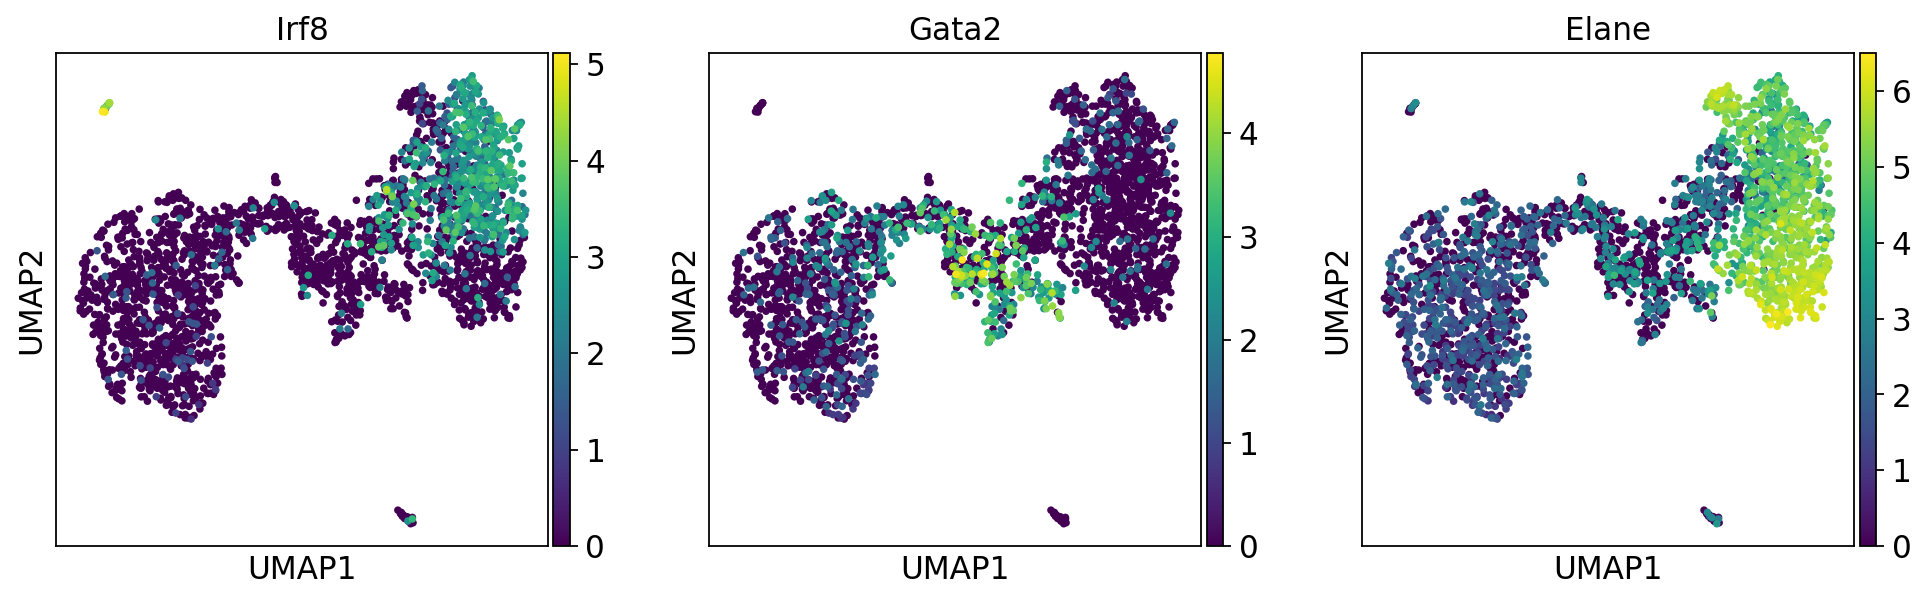

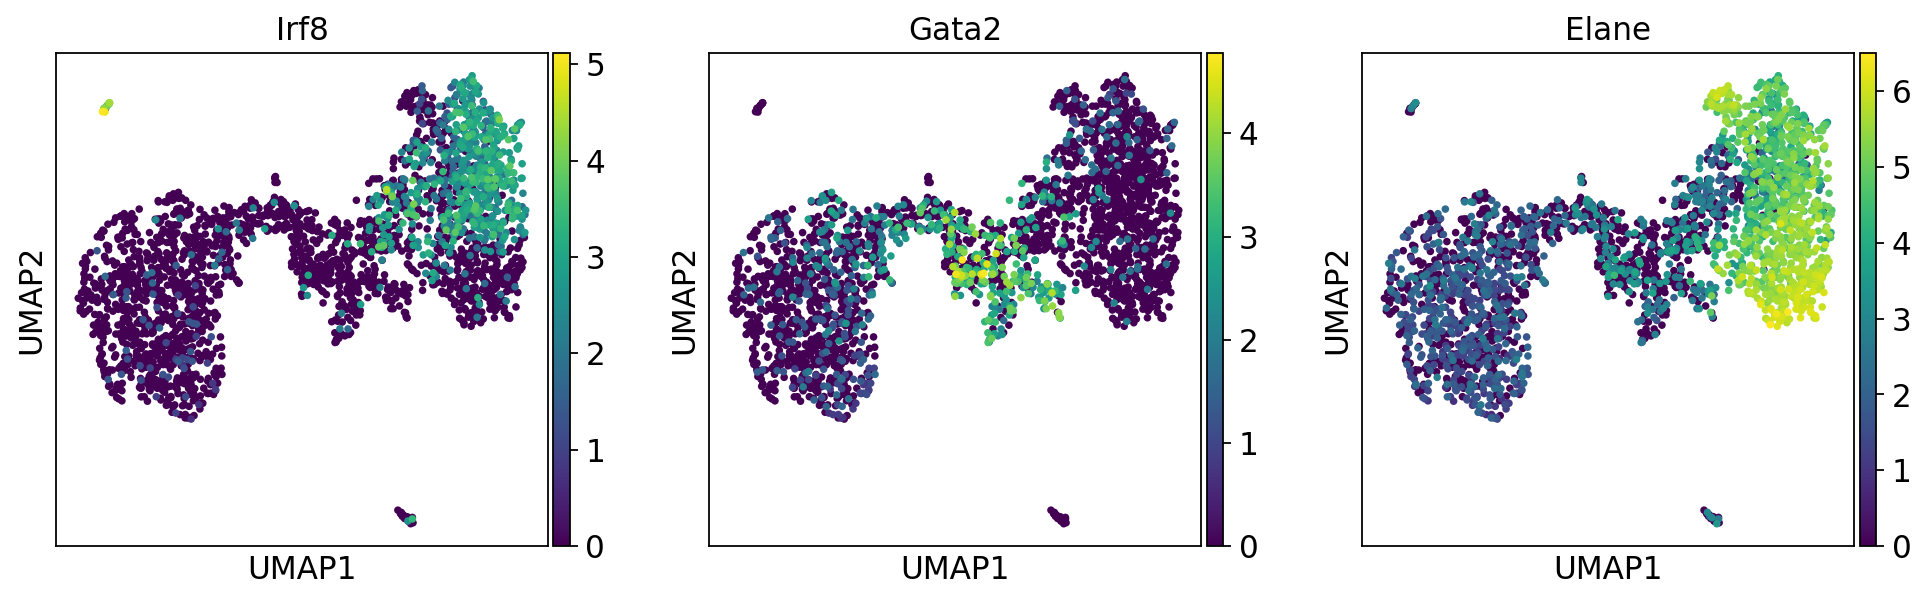

In [27]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['Irf8', 'Gata2', 'Elane'])

sc.pl.umap(adata, color=['Irf8', 'Gata2', 'Elane'], use_raw=False)

### Clustering the neighborhood graph

running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


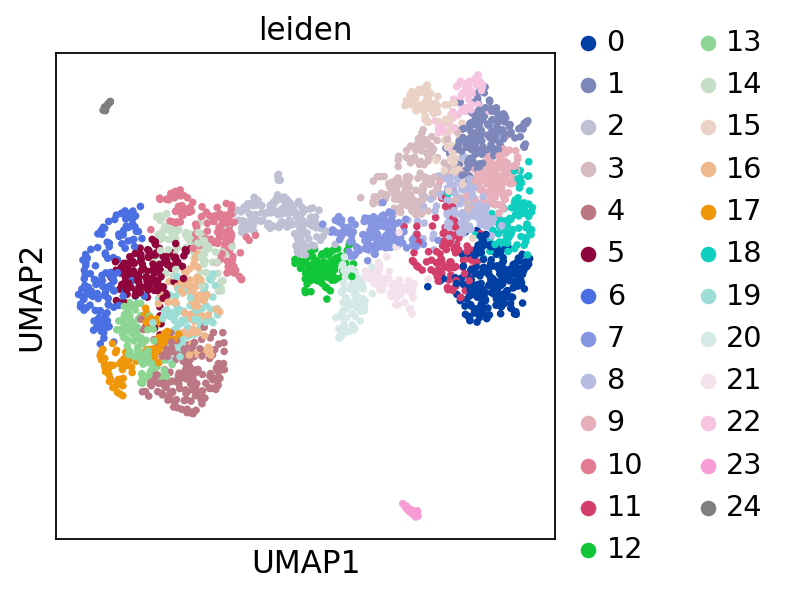

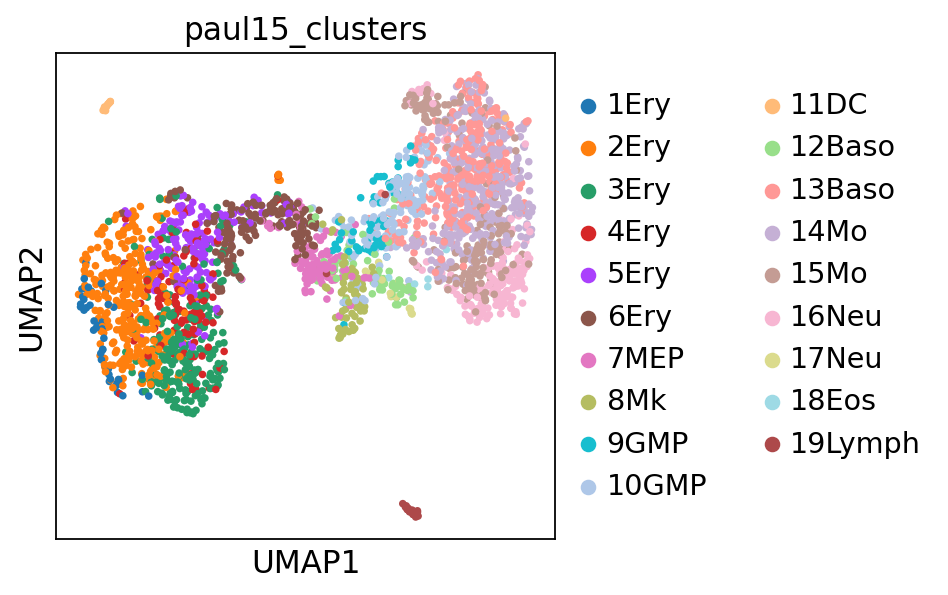

In [28]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['paul15_clusters'])

## Finding marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/home/dm/miniconda3/envs/pbmc_scrna/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/dm/miniconda3/envs/pbmc_scrna/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/dm/miniconda3/envs/pbmc_scrna/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perfo

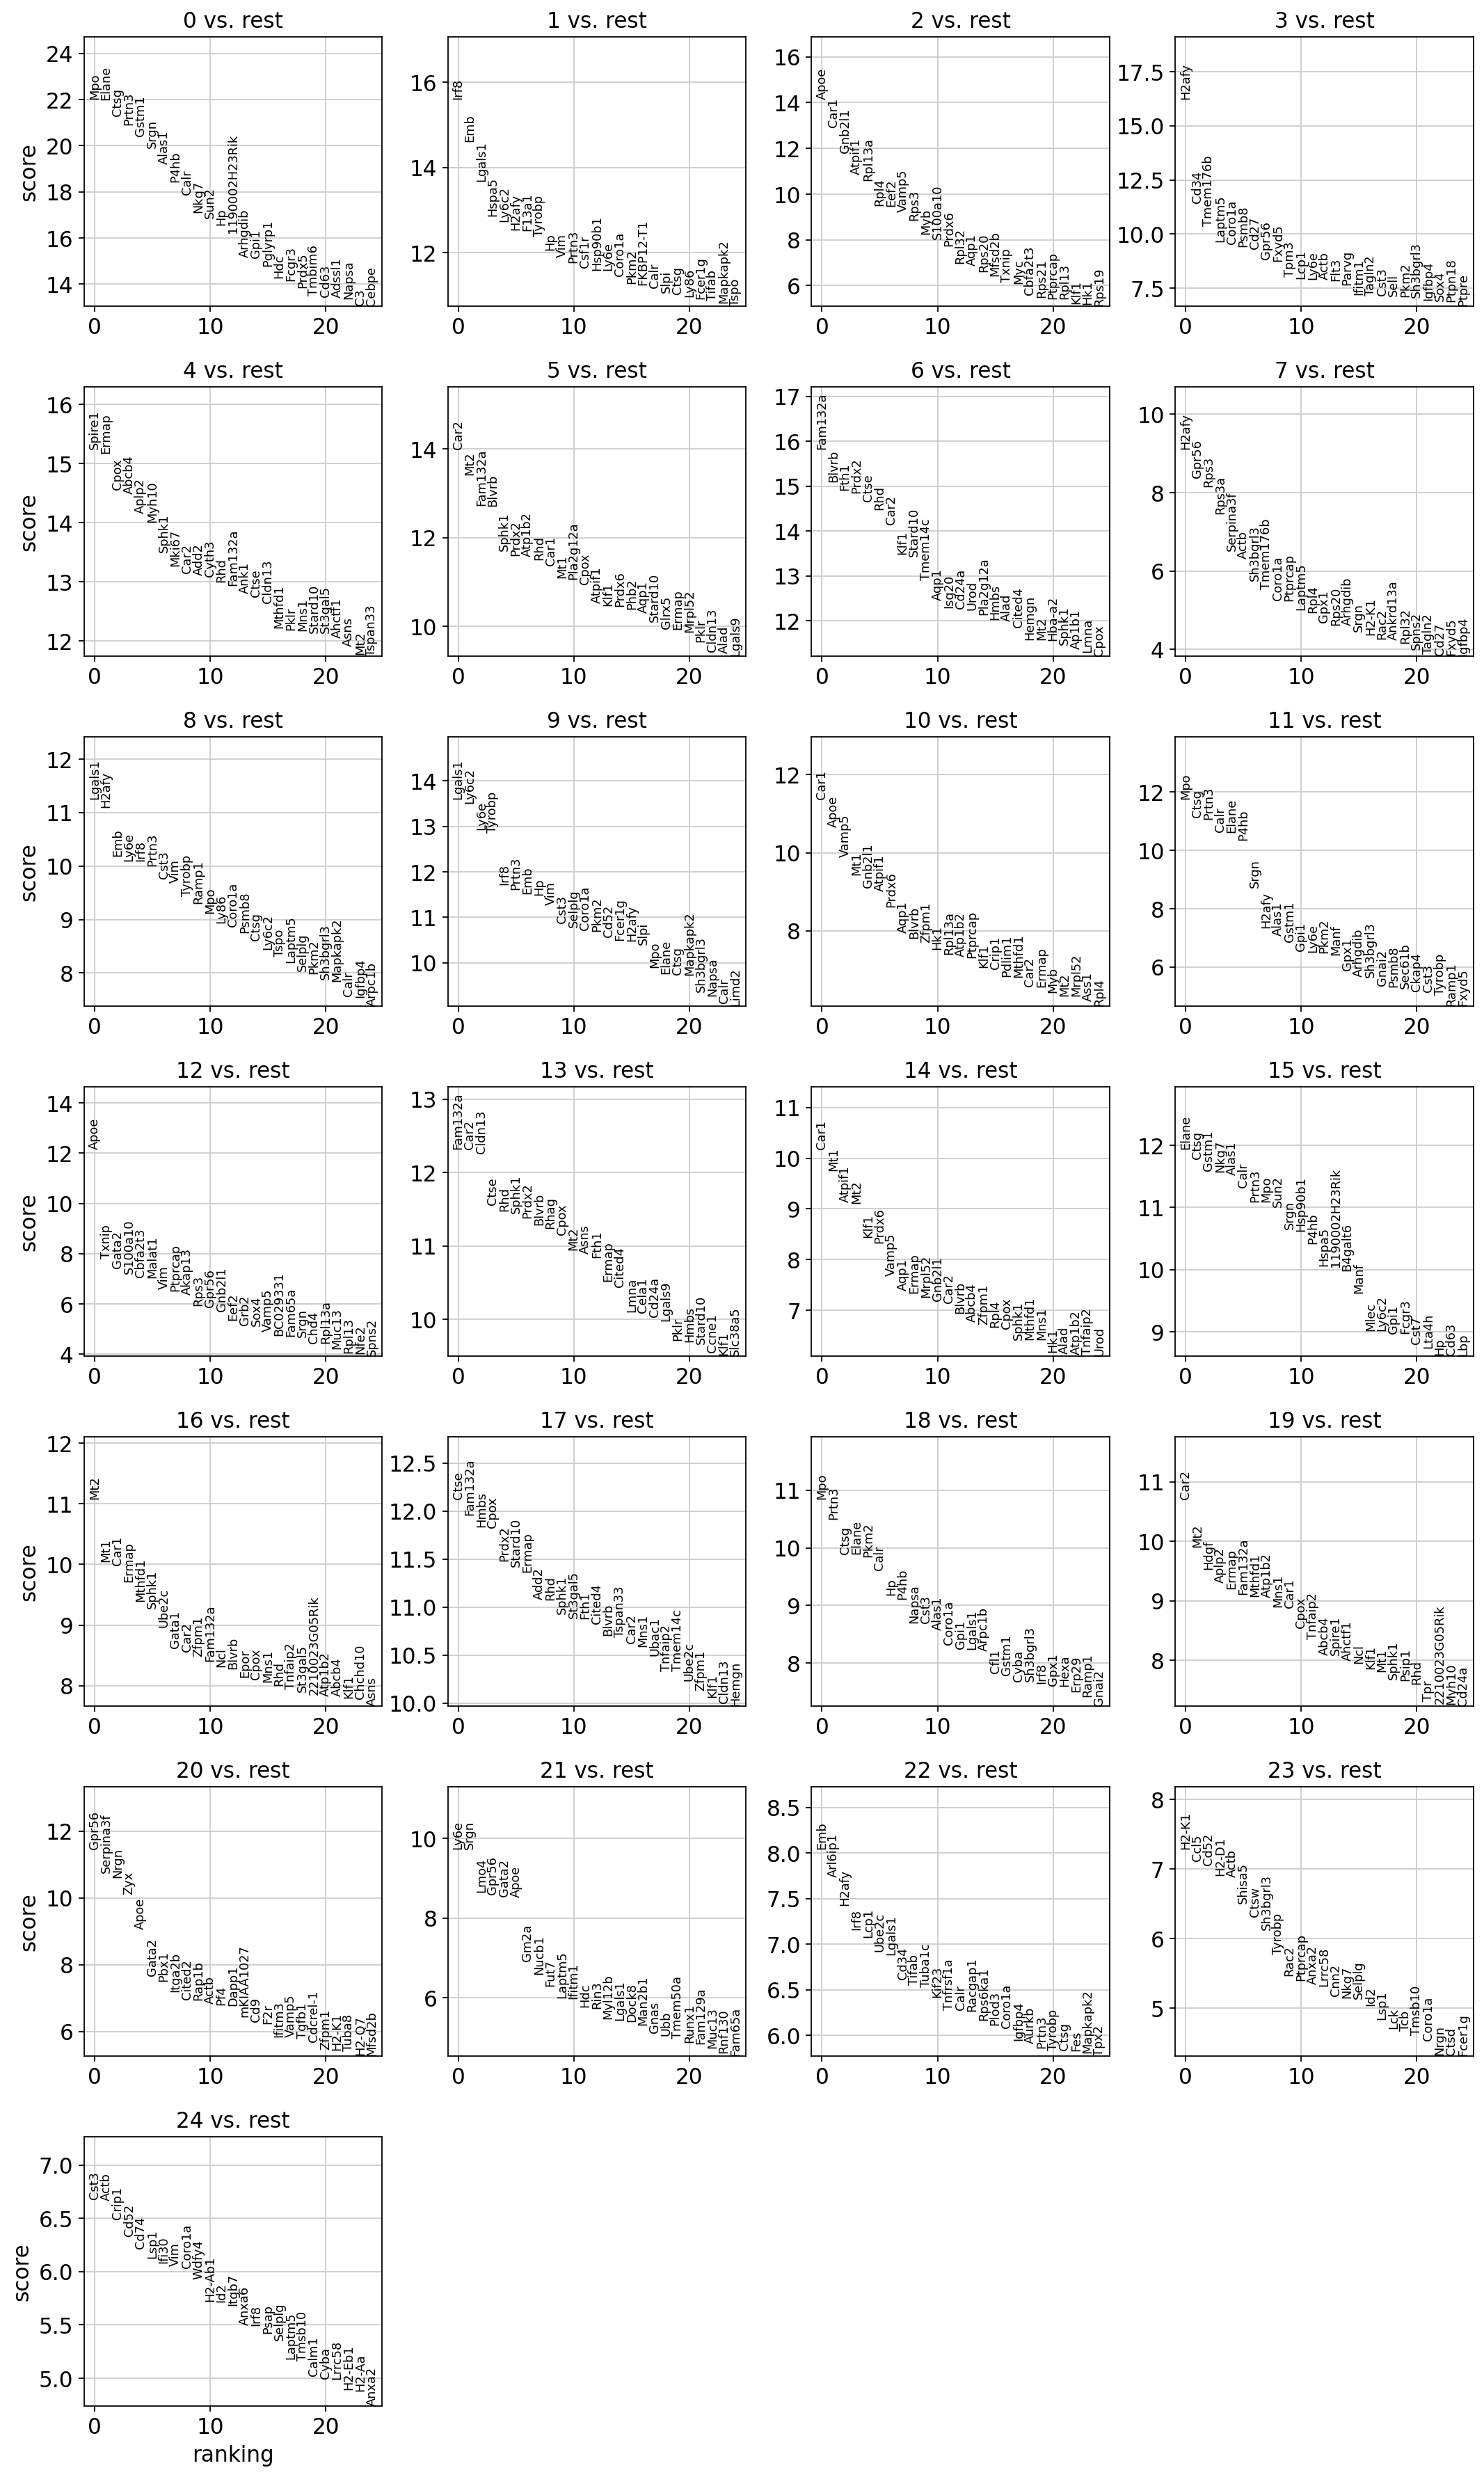

In [29]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
adata.write(results_file)
# sc.tl.rank_genes_groups(adata, 'leiden', method='logreg') the multi variate approach
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


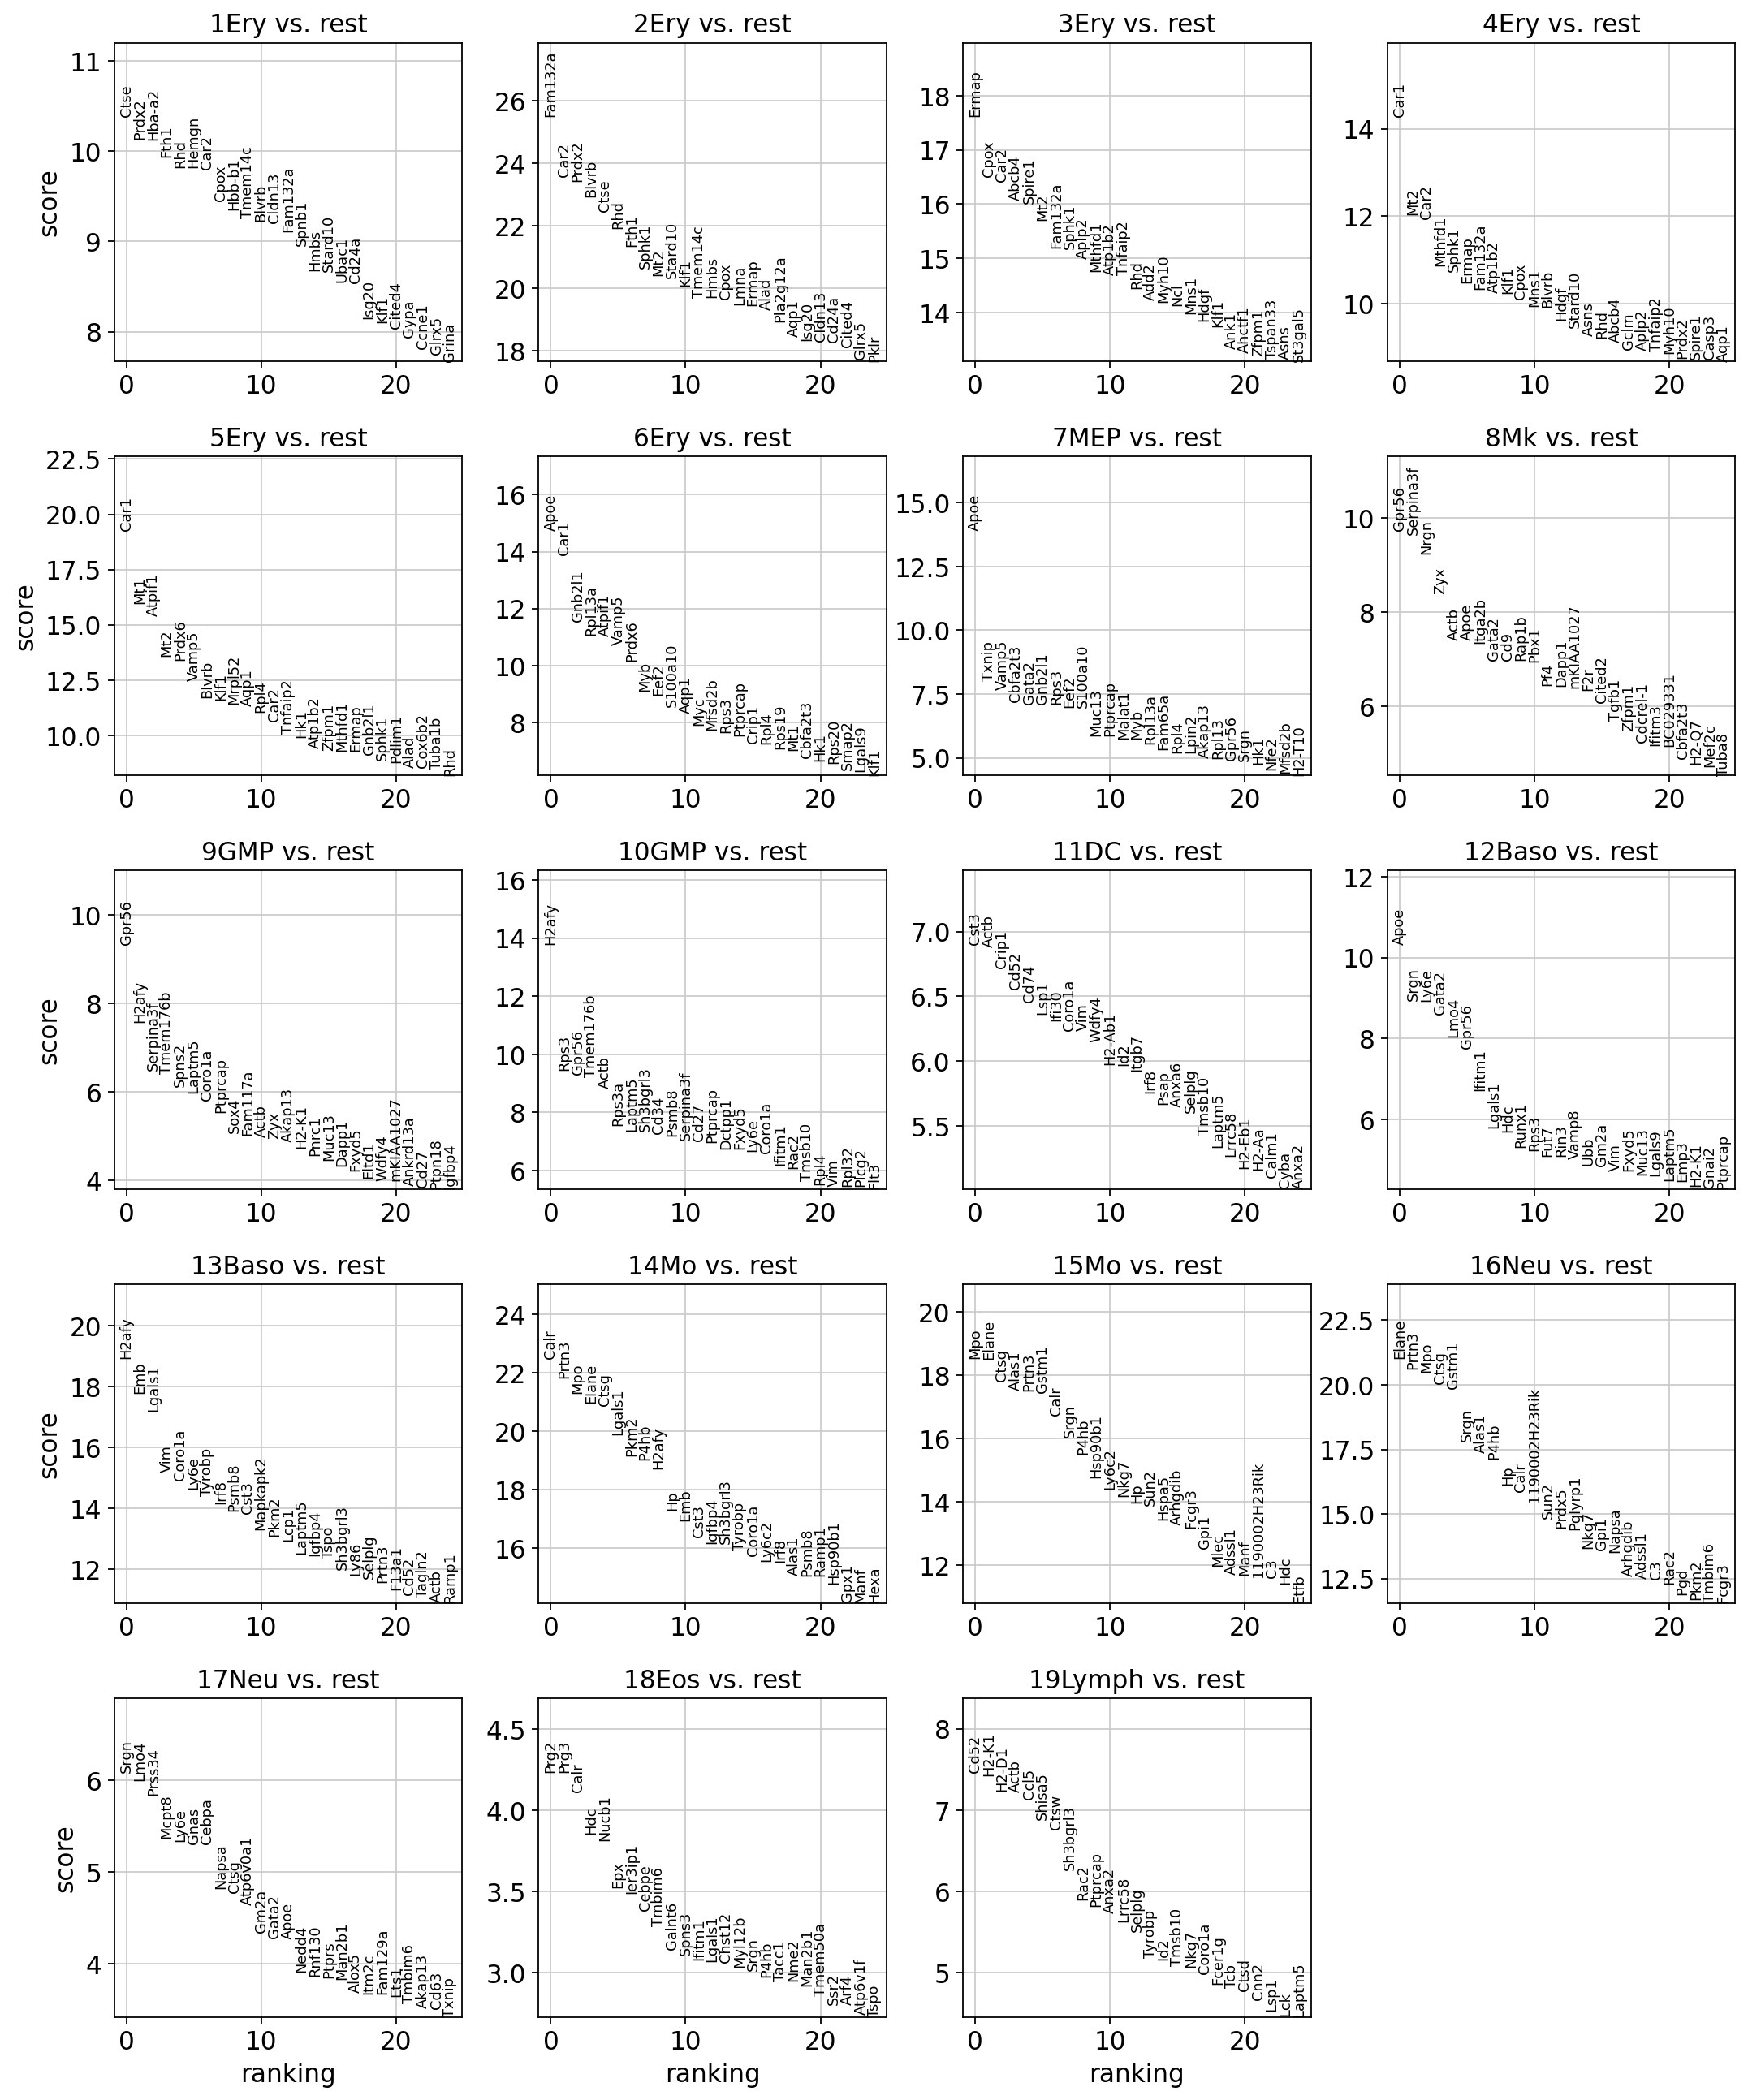

In [30]:
sc.tl.rank_genes_groups(adata, 'paul15_clusters', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [31]:
adata = sc.read(results_file)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0       1       2         3       4        5        6          7  \
0    Mpo    Irf8    Apoe     H2afy  Spire1     Car2  Fam132a      H2afy   
1  Elane     Emb    Car1      Cd34   Ermap      Mt2    Blvrb      Gpr56   
2   Ctsg  Lgals1  Gnb2l1  Tmem176b    Cpox  Fam132a     Fth1       Rps3   
3  Prtn3   Hspa5  Atpif1    Laptm5   Abcb4    Blvrb    Prdx2      Rps3a   
4  Gstm1   Ly6c2  Rpl13a    Coro1a   Aplp2    Sphk1     Ctse  Serpina3f   
5   Srgn   H2afy    Rpl4     Psmb8   Myh10    Prdx2      Rhd       Actb   
6  Alas1   F13a1    Eef2      Cd27   Sphk1   Atp1b2     Car2   Sh3bgrl3   
7   P4hb  Tyrobp   Vamp5     Gpr56   Mki67      Rhd     Klf1   Tmem176b   
8   Calr      Hp    Rps3     Fxyd5    Car2     Car1  Stard10     Coro1a   
9   Nkg7     Vim     Myb      Tpm3    Add2      Mt1  Tmem14c    Ptprcap   

        8       9  ...     15      16       17     18       19         20  \
0  Lgals1  Lgals1  ...  Elane     Mt2     Ctse    Mpo     Car2      Gpr56   
1   H2afy   Ly6c2  ...   Ctsg     Mt1  Fam132a  Prtn3      Mt2  Serpina3f   
2     Emb    Ly6e  ...  Gstm1    Car1     Hmbs   Ctsg     Hdgf       Nrgn   
3    Ly6e  Tyrobp  ...   Nkg7   Ermap     Cpox  Elane    Aplp2        Zyx   
4    Irf8    Irf8  ...  Alas1  Mthfd1    Prdx2   Pkm2    Ermap       Apoe   
5   Prtn3   Prtn3  ...   Calr   Sphk1  Stard10   Calr  Fam132a      Gata2   
6    Cst3     Emb  ...  Prtn3   Ube2c    Ermap     Hp   Mthfd1       Pbx1   
7     Vim      Hp  ...    Mpo   Gata1     Add2   P4hb   Atp1b2     Itga2b   
8  Tyrobp     Vim  ...   Sun2    Car2      Rhd  Napsa     Mns1     Cited2   
9   Ramp1    Cst3  ...   Srgn   Zfpm1    Sphk1   Cst3     Car1      Rap1b   

       21       22        23      24  
0    Ly6e      Emb     H2-K1    Cst3  
1    Srgn  Arl6ip1      Ccl5    Actb  
2    Lmo4    H2afy      Cd52   Crip1  
3   Gpr56     Irf8     H2-D1    Cd52  
4   Gata2     Lcp1      Actb    Cd74  
5    Apoe    Ube2c    Shisa5    Lsp1  
6    Gm2a   Lgals1      Ctsw   Ifi30  
7   Nucb1     Cd34  Sh3bgrl3     Vim  
8    Fut7    Tifab    Tyrobp  Coro1a  
9  Laptm5   Tuba1c      Rac2   Wdfy4  

[10 rows x 25 columns]

### Compare 2 clusters

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


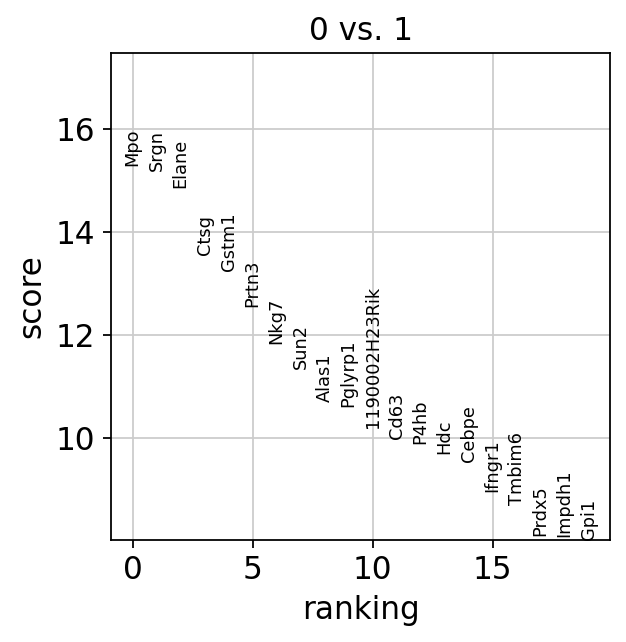

In [32]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)
adata = sc.read(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


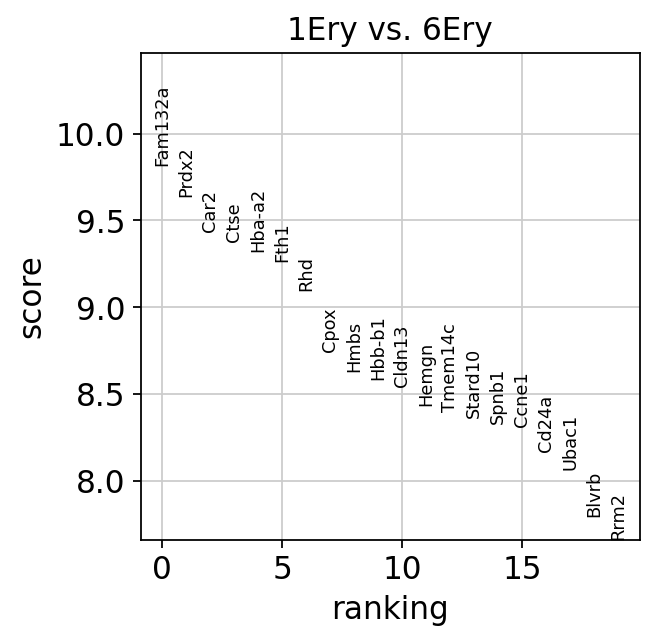

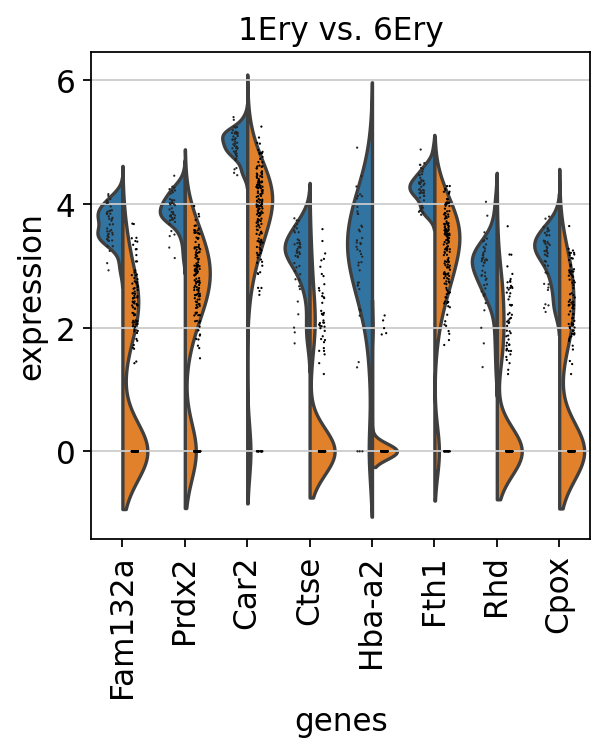

In [33]:
sc.tl.rank_genes_groups(adata, 'paul15_clusters', groups=['1Ery'], reference='6Ery', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['1Ery'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata, groups='1Ery', n_genes=8)
adata = sc.read(results_file)

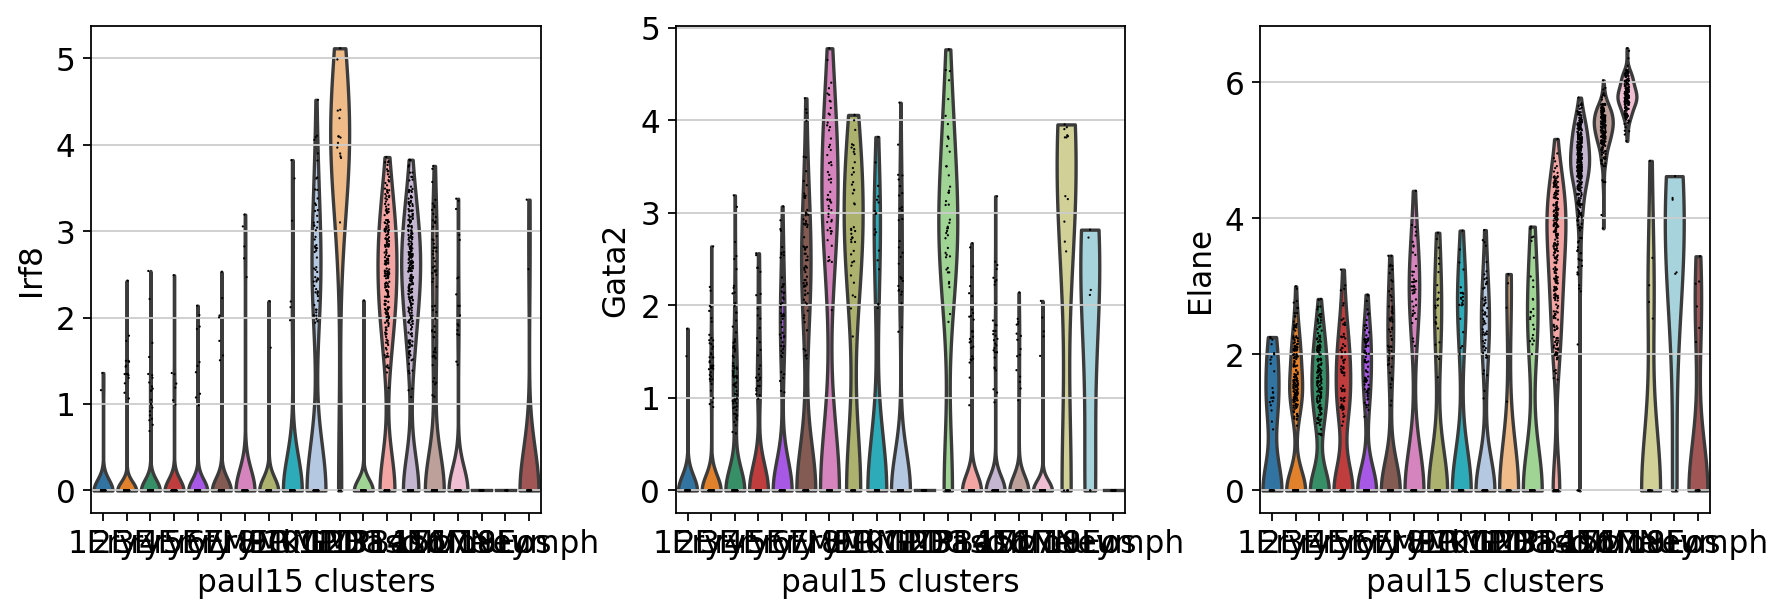

In [34]:
sc.pl.violin(adata, ['Irf8', 'Gata2', 'Elane'], groupby='paul15_clusters')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_paul15_clusters']`


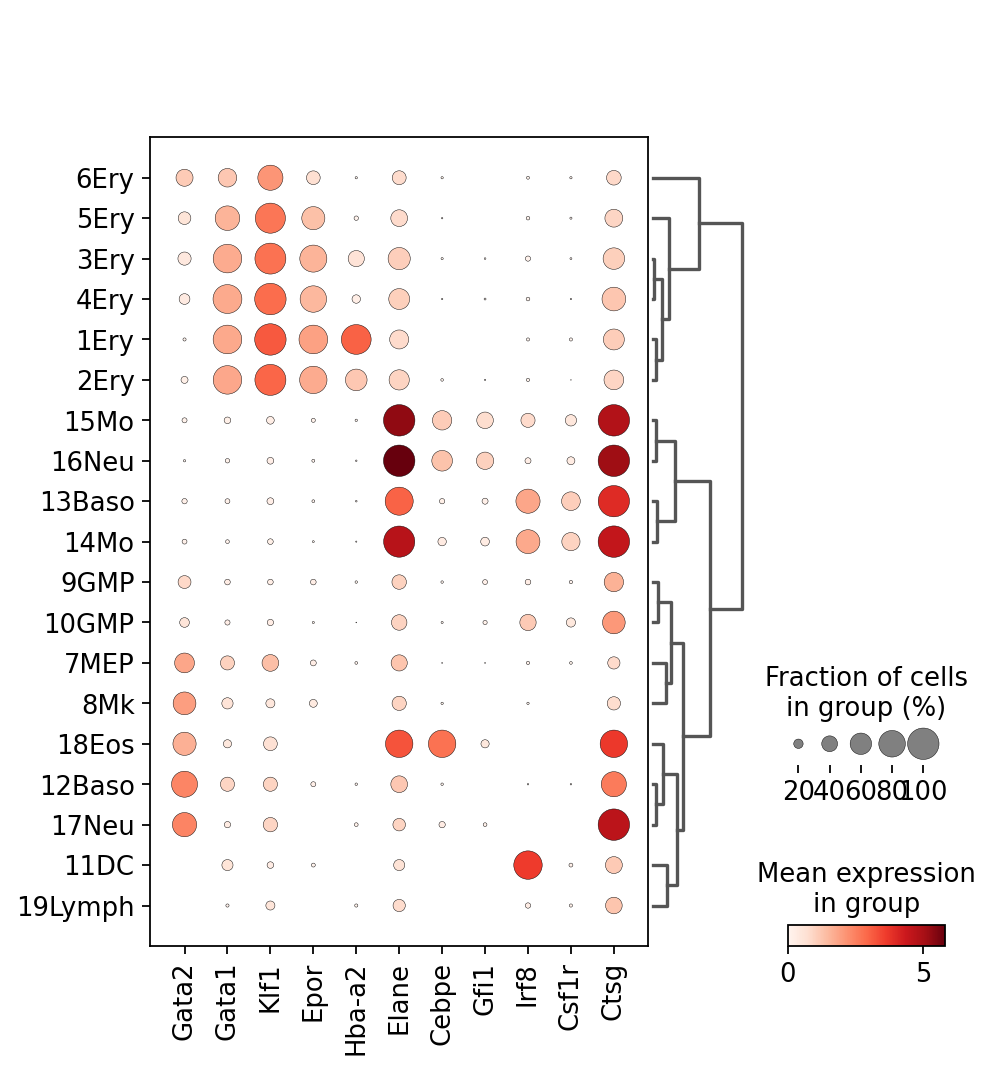

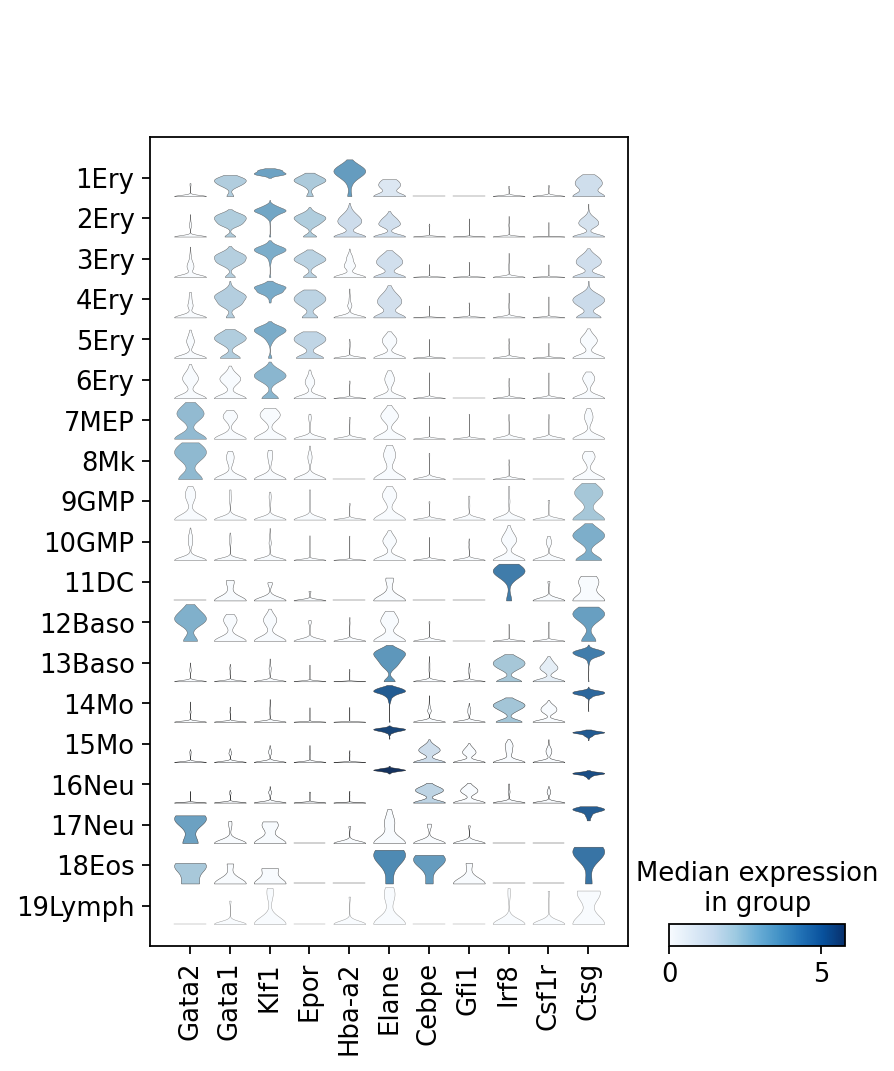

In [35]:
gene_names = ['Gata2', 'Gata1', 'Klf1', 'Epor', 'Hba-a2',  # erythroid
              'Elane', 'Cebpe', 'Gfi1',                    # neutrophil
              'Irf8', 'Csf1r', 'Ctsg']                     # monocyte


sc.pl.dotplot(adata, gene_names, 'paul15_clusters', dendrogram=True)
sc.pl.stacked_violin(adata, gene_names, groupby='paul15_clusters', rotation=90);

## Trajectory inference

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


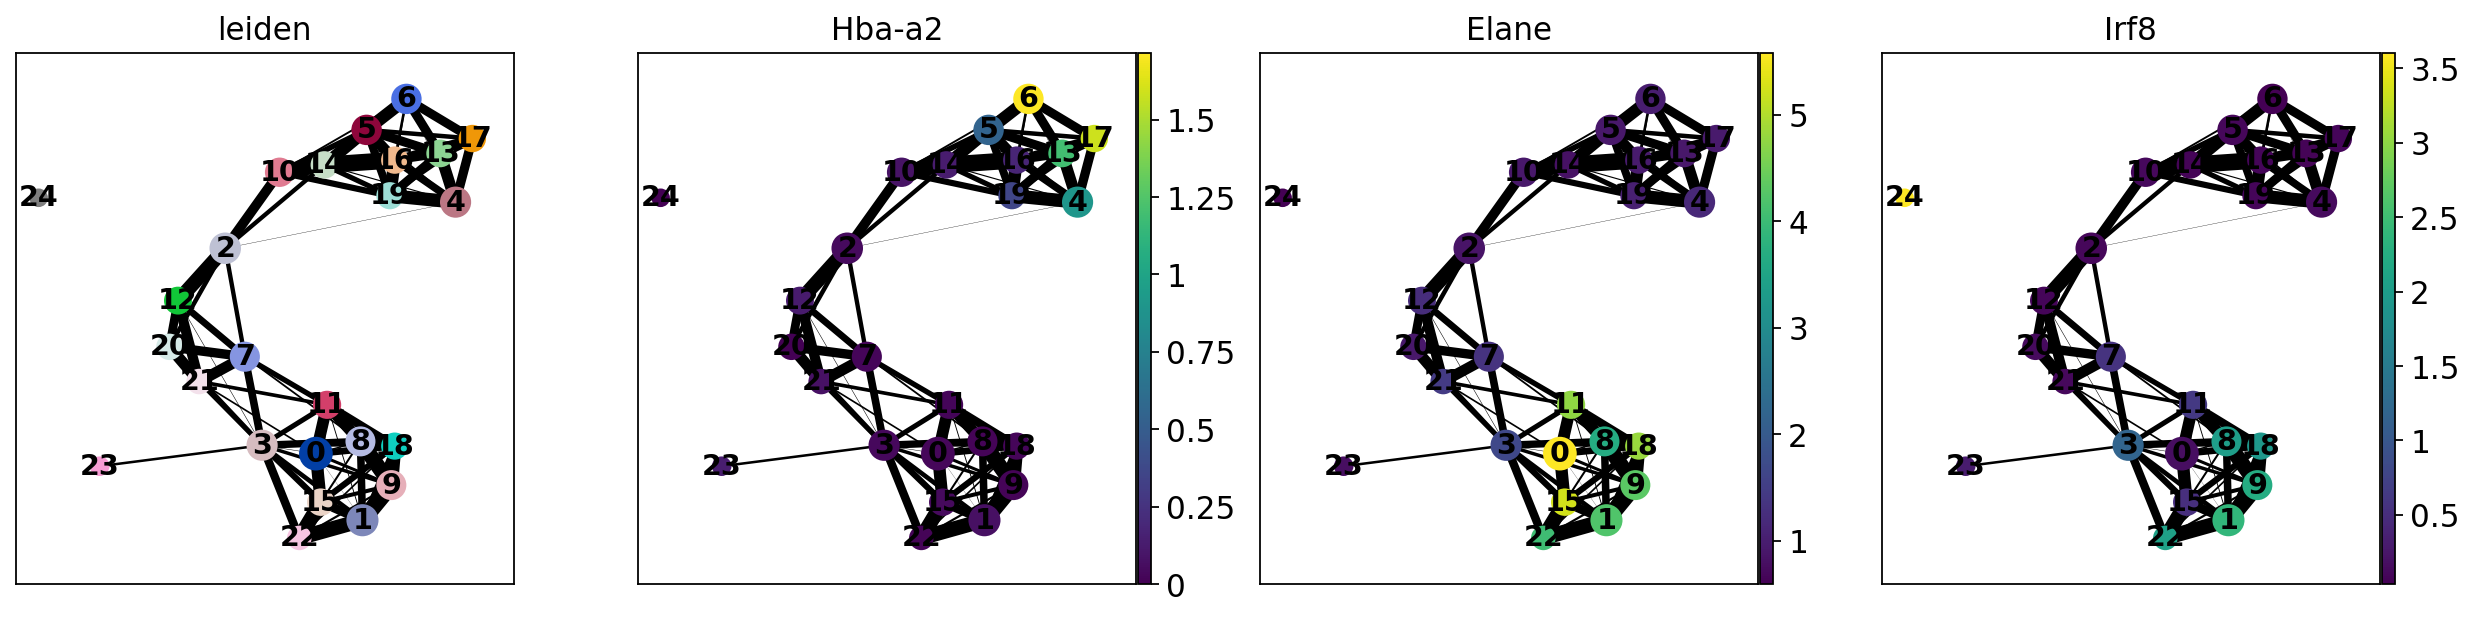

--> added 'pos', the PAGA positions (adata.uns['paga'])


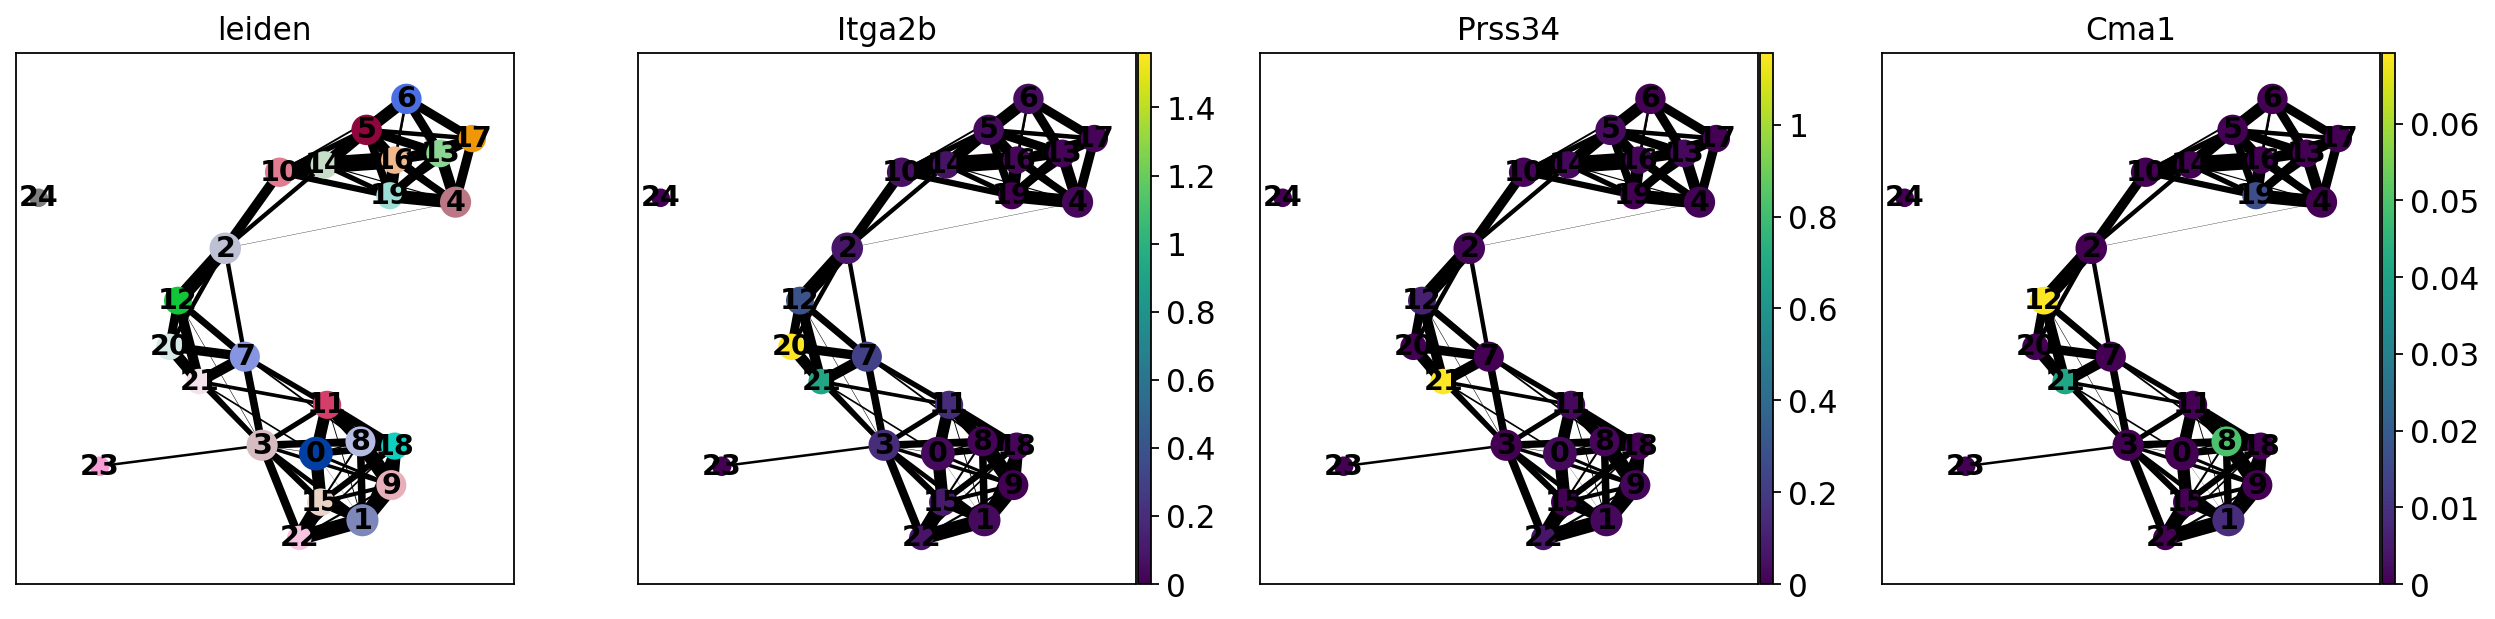

Leiden cats: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')
leiden_anno cats: Index(['0/Neu', '1/Mo', '2/Stem', '3', '4', '5', '6/Ery', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20/Mk',
       '21/Baso', '22', '23', '24'],
      dtype='object')


AttributeError: 'Index' object has no attribute 'add_categories'

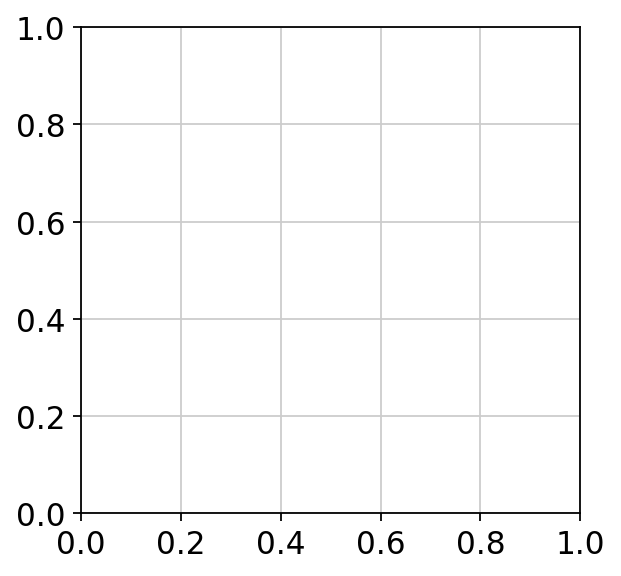

In [53]:
# re_annotate
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden', 'Hba-a2', 'Elane', 'Irf8'])
sc.pl.paga(adata, color=['leiden', 'Itga2b', 'Prss34', 'Cma1'])

print("Leiden cats:", adata.obs['leiden'].cat.categories)
adata.obs['leiden_anno'] = adata.obs['leiden']

adata.obs['leiden_anno'].cat.categories = ['0/Neu', '1/Mo', '2/Stem', '3', '4', '5', '6/Ery', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20/Mk', '21/Baso', '22', '23', '24']

print("leiden_anno cats:", adata.obs['leiden_anno'].cat.categories)


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes:>

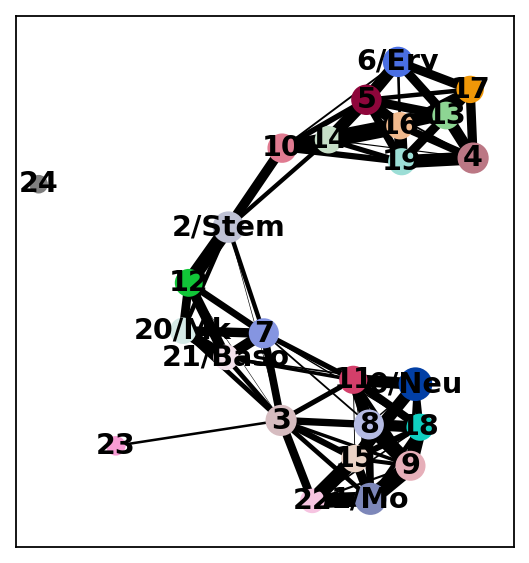

In [60]:
# project paga
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03, show=False)


### Projecting Trajectory inference

We are using stem cells as the base for pseudo time estimation

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


/home/dm/miniconda3/envs/pbmc_scrna/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'paul15_clusters' as categorical
Trying to set attribute `._uns` of view, copying.


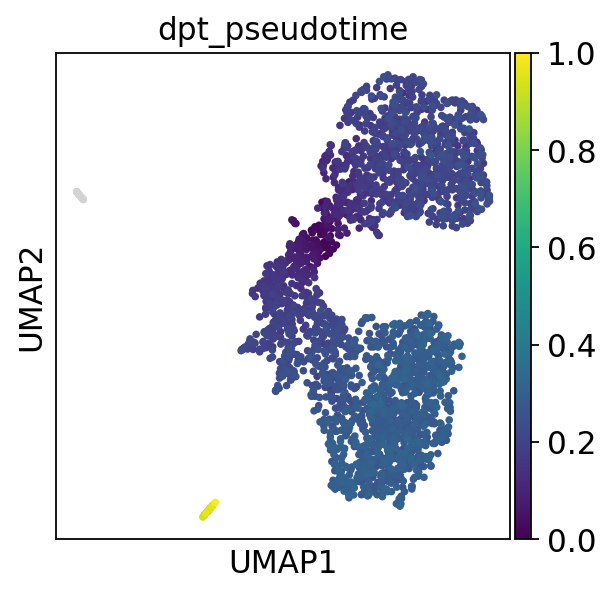

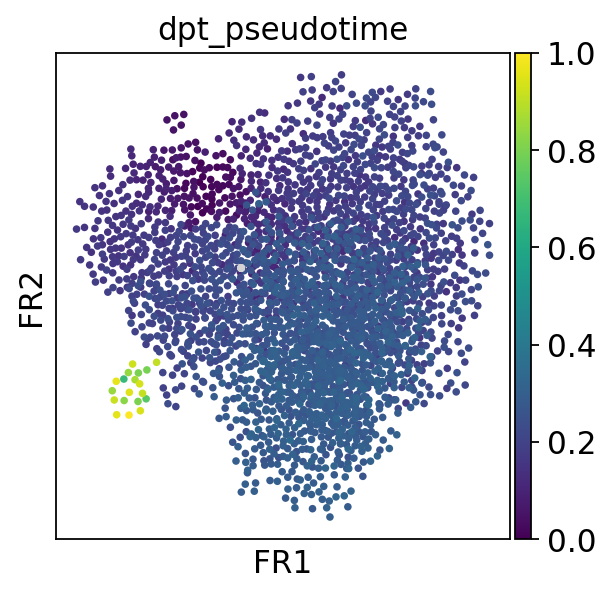

In [58]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == '2/Stem')[0]
sc.tl.dpt(adata)

gene_names = ['Gata2', 'Gata1', 'Klf1', 'Epor', 'Hba-a2',  # erythroid
              'Elane', 'Cebpe', 'Gfi1',                    # neutrophil
              'Irf8', 'Csf1r', 'Ctsg']

adata_raw = sc.datasets.paul15()
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

sc.pl.umap(adata, color=['dpt_pseudotime'], legend_loc='on data')